# 1. Install and Import Dependencies

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 && pip install -r requirements.txt

In [10]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

# 2. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-12 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

# 3. Make Detections with Images

In [5]:
img = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdeskrush.com%2Fwp-content%2Fuploads%2F2018%2F06%2FBugatti-Chiron4.jpg&f=1&nofb=1&ipt=5d54a86831d288f556ecb6a55853937305baaf989a7d5d2d1ed777c5f75d877a&ipo=images'

In [6]:
results = model(img)
results.print()

image 1/1: 1375x2250 1 car
Speed: 1437.9ms pre-process, 46.7ms inference, 2.0ms NMS per image at shape (1, 3, 416, 640)


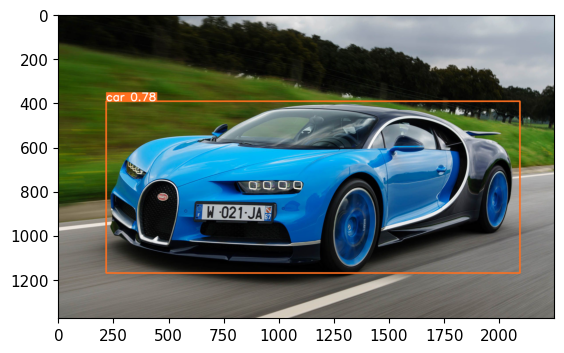

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# get dataset

In [40]:
import os
!git clone https://github.com/Ala-Alsanea/sketch_web_ui_dataset.git

Cloning into 'sketch_web_ui_dataset'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 44 (delta 21), reused 36 (delta 13), pack-reused 0
Unpacking objects: 100% (44/44), 23.48 MiB | 8.24 MiB/s, done.


In [ ]:
!pip3 install --user 'git+https://github.com/facebookresearch/detectron2.git'
!pip3 install keras_retinanet

In [ ]:
!git clone https://github.com/tensorflow/models 
!apt install protobuf-compiler
!cd models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python3 -m pip install . 
    

In [ ]:
!pip3 uninstall -y numpy
!pip3 install numpy

In [ ]:
VERIFICATION_SCRIPT = os.path.join('models', 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python3 {VERIFICATION_SCRIPT}

In [ ]:
!python3 sketch_web_ui_dataset/create_new_dataset_and_preprocess.py -p sketch_web_ui_dataset

# 5. Train from scratch

In [101]:
pre_model='yolov5m'

In [102]:
!cd yolov5 && python3 train.py --img 320 --batch 64 --epochs 100 --data ../sketch_web_ui_dataset/dataset.yaml --weights {pre_model}.pt --workers 8

train: weights=yolov5m.pt, cfg=, data=../sketch_web_ui_dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-165-ge382d4c Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

# 6. Load Custom Model

In [104]:
model_exp='exp6'

In [119]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=f'yolov5/runs/train/{model_exp}/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-12 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20889303 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [111]:
img = 'sketch_web_ui_dataset/new_dataset/00004_png.rf.ca684ae59d6f64243191968d04714a9f.jpg'

In [112]:
results = model(img)

In [113]:
results.print()

image 1/1: 640x640 1 Heading, 7 Images, 13 Labels, 5 Paragraphs
Speed: 15.9ms pre-process, 26.7ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)


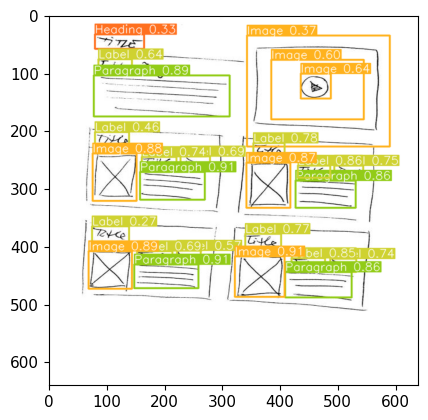

In [114]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [115]:
!tar -czf {pre_model}[{model_exp}].tar.gz yolov5/runs/train/{model_exp}

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd yolov5 && python3 val.py  --img 640 --half --data ../sketch_web_ui_dataset/dataset.yaml --weights runs/train/{model_exp}/weights/last.pt